## Observations and analysis
- There is a positive correlation between max temperature and latitude in the Southern Hemisphere and a negative correlation in the Northern Hemisphere. Conclusion: The closer a city is to the Equator, the more likely it will have a higher max temperature than cities further away from the Equator.
- There is a very slight negative correleation between humidity and city latitde in the Southern Hemisphere and a slightly steeper negative correlelation between humidity and city latitude. Conclusion: In the Southern Hemisphere, humidity is barely affected by latitude; however in the Norther Hemisphere, cities closer to the Equator likely will have a slightly higher humidity percentage than cities further from the Equator.
- There is a positive correlation between cloudiness and latitude in the Southern Hemisphere and a negative correlation in the Northern Hemisphere. Conclusion: The closer a city is to the Equator, the more likely it will be cloudier than cities further away from the Equator.
- There is a very slight positive correleation between wind speed and city latitde in the Southern Hemisphere and a slightly less positive correlelation between wind speed and city latitude in the Northern Hemisphere. Conclusion: In the both Hemispheres, wind speed is barely affected by latitude, with Southern Hemisphere winds speeds picking up slightly as city latitudes approach the equator and Northern Hemisphere winds speeds decreasing as city latitudes approach the Equator.

In [261]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import scipy.stats as st
import os

In [274]:
# Create folder "output_data" to store output files
os.mkdir("output_data")

In [184]:
# Import API key
from config import weather_api_key

In [185]:
# Import list of cities with lat and lng
# CSV Source: https://simplemaps.com/data/world-cities
cities_csv_path = "simplemaps_worldcities_basicv1/worldcities.csv"
cities_raw = pd.read_csv(cities_csv_path)

In [186]:
# Pare down columns and select a sample of 1000 cities
cities_select_columns = cities_raw[["city_ascii", "country", "lat", "lng", "id"]]
cities_sample = cities_select_columns.sample(1000)

In [187]:
len(cities_sample)

1000

In [188]:
# Get lats and lons for each city and store in a list of tuples
city_lats = cities_sample["lat"]
city_lons = cities_sample["lng"]
city_lats_lons = list(zip(city_lats, city_lons))

In [190]:
# Iterative call to API to get and store weather data in a dictionary
base_url = "https://api.openweathermap.org/data/2.5/weather"
units = "imperial"
weather_stats = []

for lat, lon in city_lats_lons:
    params = {"lat" : lat,
              "lon" : lon,
              "appid" : weather_api_key,
              "units" : units}

    results_json = requests.get(url=base_url, params=params).json()

    temp_max_f = results_json["main"]["temp_max"]
    humidity = results_json["main"]["humidity"]
    cloudiness = results_json["clouds"]["all"]
    wind_speed = results_json["wind"]["speed"]
    city_id = results_json["id"]
    city = results_json["name"]
    try:
        country = results_json["sys"]["country"]
    except:
        country = "-"
    date = results_json["dt"]

    weather = {"city" : city, "country" : country, "lat" : lat, "lon" : lon, "max_temp (F)" : temp_max_f, "humidity (%)" : humidity , "cloudiness (%)" : cloudiness, "wind_speed (mph)" : wind_speed , "date" : date}
    weather_stats.append(weather)

    print(f"City ID: {city_id} | City: {city} | Country: {country}")

City ID: 4565119 | City: Guaynabo | Country: PR
City ID: 3042068 | City: Eschen | Country: LI
City ID: 5102208 | City: Oradell | Country: US
City ID: 1830377 | City: Lumphat | Country: KH
City ID: 4560549 | City: Prospect Park | Country: US
City ID: 4938501 | City: Groveland | Country: US
City ID: 2512989 | City: Palma de Mallorca | Country: ES
City ID: 1729838 | City: Ayusan Uno | Country: PH
City ID: 5244010 | City: Antigo | Country: US
City ID: 726141 | City: Turtucaia | Country: BG
City ID: 5410125 | City: Winters | Country: US
City ID: 1696165 | City: Palayan City | Country: PH
City ID: 5110211 | City: Broadalbin | Country: US
City ID: 2647138 | City: Hemel Hempstead | Country: GB
City ID: 5124017 | City: Larchmont | Country: US
City ID: 3187706 | City: Vipava | Country: SI
City ID: 5491487 | City: Silver City | Country: US
City ID: 2523908 | City: Palma di Montechiaro | Country: IT
City ID: 3404833 | City: Brejo Santo | Country: BR
City ID: 2659358 | City: Oberrieden | Country: C

In [191]:
# Create the dataframe
city_weather_df = pd.DataFrame(weather_stats)

# Check if any cities have humidity over 100%
city_weather_df.loc[city_weather_df["humidity (%)"] > 100]

,city,country,lat,lon,max_temp (F),humidity (%),cloudiness (%),wind_speed (mph),date


There are no cities with humidity greater than 100%

In [275]:
city_weather_df.to_csv("output_data/cities.csv")

In [260]:
# Find date in last row of data frame and assign it to a variable
utc_date_int = city_weather_df["date"].tail(1).item()
utc_date_int
date = datetime.fromtimestamp(utc_date_int).strftime("%d %b %Y")

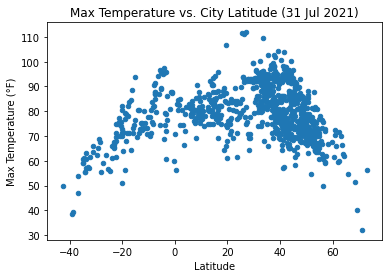

In [276]:
# Plot Max Temp vs City Latitude
max_temp_vs_lat_plot = city_weather_df.plot(kind="scatter", 
                                            x="lat", 
                                            y="max_temp (F)", 
                                            title=f"Max Temperature vs. City Latitude ({date})", 
                                            xlabel="Latitude", 
                                            ylabel="Max Temperature (°F)").figure 
plt.show()
max_temp_vs_lat_plot.savefig("output_data/max_temp_vs_lat_plot.png")

**The above figure was created using python and pandas to generate a scatter plot juxtaposing max temperature of cities around the world and their latitude.**

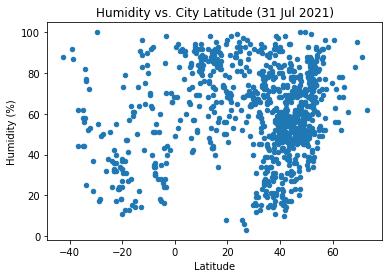

In [277]:
# Plot Humidity vs City Latitude
humidity_vs_lat_plot = city_weather_df.plot(kind="scatter", 
                                            x="lat", 
                                            y="humidity (%)", 
                                            title=f"Humidity vs. City Latitude ({date})", 
                                            xlabel="Latitude", 
                                            ylabel="Humidity (%)").figure
plt.show()
humidity_vs_lat_plot.savefig("output_data/humidity_vs_lat_plot.png")

**The above figure was created using python and pandas to generate a scatter plot juxtaposing humidity percentage of cities around the world and their latitude.**

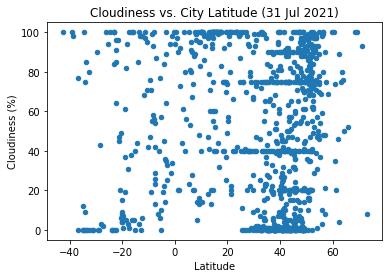

In [278]:
# Plot Cloudiness vs City Latitude
cloudiness_vs_lat_plot = city_weather_df.plot(kind="scatter", 
                                               x="lat", 
                                               y="cloudiness (%)", 
                                               title=f"Cloudiness vs. City Latitude ({date})", 
                                               xlabel="Latitude", 
                                               ylabel="Cloudiness (%)").figure
plt.show()
cloudiness_vs_lat_plot.savefig("output_data/cloudiness_vs_lat_plot.png")

**The above figure was created using python and pandas to generate a scatter plot juxtaposing cloudiness percentage of cities around the world and their latitude.**

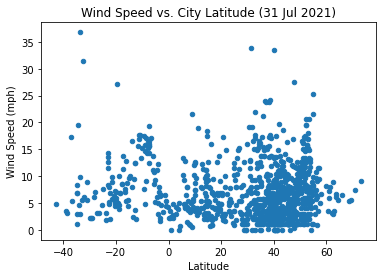

In [279]:
# Plot Wind Speed vs City Latitude
wind_speed_vs_lat_plot = city_weather_df.plot(kind="scatter", 
                                              x="lat", 
                                              y="wind_speed (mph)", 
                                              title=f"Wind Speed vs. City Latitude ({date})", 
                                              xlabel="Latitude", 
                                              ylabel="Wind Speed (mph)").figure
plt.show()
wind_speed_vs_lat_plot.savefig("output_data/wind_speed_vs_lat_plot.png")

**The above figure was created using python and pandas to generate a scatter plot juxtaposing wind speeds of cities around the world and their latitude.**

In [198]:
# Sort city_weather_df by "lat" ascending
city_weather_df = city_weather_df.sort_values(by="lat", ascending=True)

In [199]:
southern_hemisphere_cities = city_weather_df.loc[city_weather_df["lat"] < 0]
northern_hemisphere_cities = city_weather_df.loc[city_weather_df["lat"] >= 0]

In [200]:
#Create helper function for plotting Southern Hemisphere data
def southern_hemisphere_subplot(y_col, ylabel):
    """ Creates a subplot for Southern Hemisphere data resulting in a scatter plot and line of regression"""
    
    x_axis = southern_hemisphere_cities["lat"]
    y_axis = southern_hemisphere_cities[y_col]
    
    # Plot scatter plot
    plt.subplot(1, 2, 1)
    plt.scatter(x=x_axis, y=y_axis, color="powderblue")
    plt.title("Southern Hemisphere")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    
    # Calculate slope and y-intercept
    slope = round(st.linregress(x=x_axis, y=y_axis).slope, 3)
    y_intercept = round(st.linregress(x=x_axis, y=y_axis).intercept, 3)

    # Calculate y values for line of regression
    regression_y = []

    for i in x_axis:
        y = (slope * i) + y_intercept
        regression_y.append(y)

    # Dertermine coordinates for annotation
    x_df = pd.DataFrame({"Lats" : x_axis})
    x_median = x_df.median()

    y_df = pd.DataFrame({"Y Plots" : regression_y})
    y_median = y_df.median()
    
    offset = slope * -15

    # Plot line of regression
    plt.plot(x_axis, regression_y, color="red")
    plt.annotate(text=f"y={slope}x + {y_intercept}", xy=(x_median,y_median+offset), fontsize=14, color="red")


In [201]:
#Create helper function for plotting Northern Hemisphere data
def northern_hemisphere_subplot(y_col, ylabel):
    """ Creates a subplot for Northern Hemisphere data resulting in a scatter plot and line of regression"""
    
    x_axis = northern_hemisphere_cities["lat"]
    y_axis = northern_hemisphere_cities[y_col]

    
    # Plot scatter plot
    plt.subplot(1, 2, 2)
    plt.scatter(x=x_axis, y=y_axis, color="powderblue")
    plt.title("Northern Hemisphere")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    
    # Calculate slope and y-intercept
    slope = round(st.linregress(x=x_axis, y=y_axis).slope, 3)
    y_intercept = round(st.linregress(x=x_axis, y=y_axis).intercept, 3)

    # Calculate y values for line of regression
    regression_y = []

    for i in x_axis:
        y = (slope * i) + y_intercept
        regression_y.append(y)

    # Dertermine coordinates for annotation
    x_df = pd.DataFrame({"Lats" : x_axis})
    x_median = x_df.median()

    y_df = pd.DataFrame({"Y Plots" : regression_y})
    y_median = y_df.median()
    
    offset = slope * -15

    # Plot line of regression
    plt.plot(x_axis, regression_y, color="red")
    plt.annotate(text=f"y={slope}x + {y_intercept}", xy=(x_median,y_median+offset), fontsize=14, color="red")


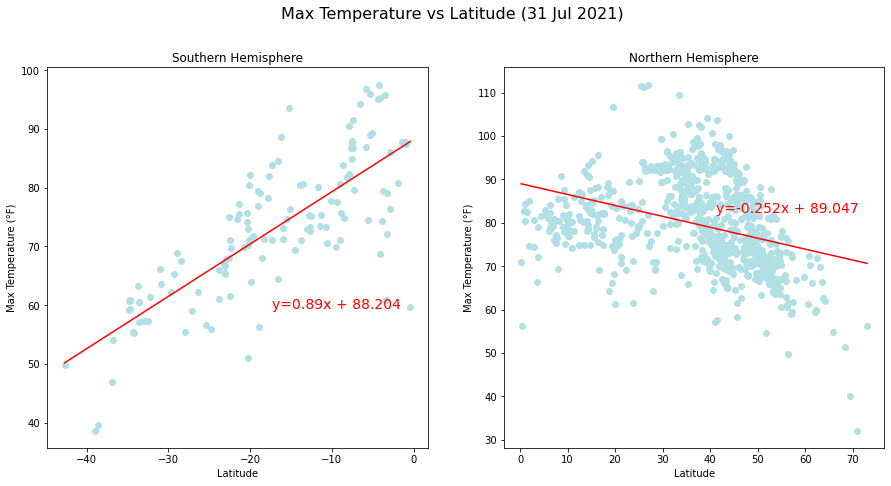

In [280]:
# Create a two-part figure that shows max temperature for the Southern and Northern Hemispheres 
south_north_temps_full_fig = plt.figure(figsize=(15,7))
south_north_temps_full_fig.suptitle(t=f"Max Temperature vs Latitude ({date})", y=1, size=16)
southern_hemisphere_subplot(y_col="max_temp (F)", ylabel="Max Temperature (°F)")
northern_hemisphere_subplot(y_col="max_temp (F)", ylabel="Max Temperature (°F)")
plt.show()

# Save figure to .png file
south_north_temps_full_fig.savefig("output_data/south_north_temps_full_fig.png")

**The linear regressions of the above plots show a positive correlation between max temperature and latitude in the Southern Hemisphere and a negative correlation in the Northern Hemisphere. Conclusion: The closer a city is to the Equator, the more likely it will have a higher max temperature than cities further away from the Equator.**

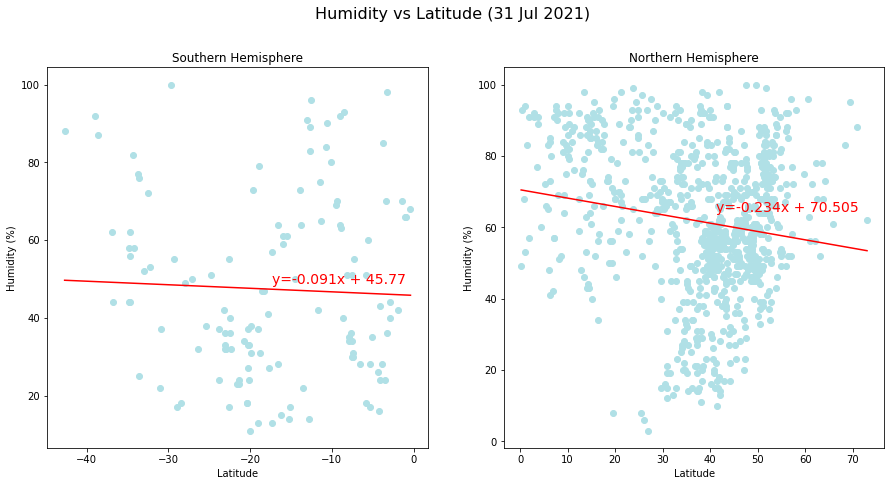

In [281]:
# Create a two-part figure that shows humidity for the Southern and Northern Hemispheres 
south_north_humidity_full_fig = plt.figure(figsize=(15,7))
south_north_humidity_full_fig.suptitle(t=f"Humidity vs Latitude ({date})", y=1, size=16)
southern_hemisphere_subplot(y_col="humidity (%)", ylabel="Humidity (%)")
northern_hemisphere_subplot(y_col="humidity (%)", ylabel="Humidity (%)")
plt.show()

# Save figure to .png file
south_north_humidity_full_fig.savefig("output_data/south_north_humidity_full_fig.png")

**The linear regression of the above plots show a very slight negative correleation between humidity and city latitde in the Southern Hemisphere and a slightly steeper negative correlelation between humidity and city latitude. Conclusion: In the Southern Hemisphere, humidity is barely affected by latitude; however in the Norther Hemisphere, cities closer to the Equator likely will have a slightly higher humidity percentage than cities further from the Equator.**

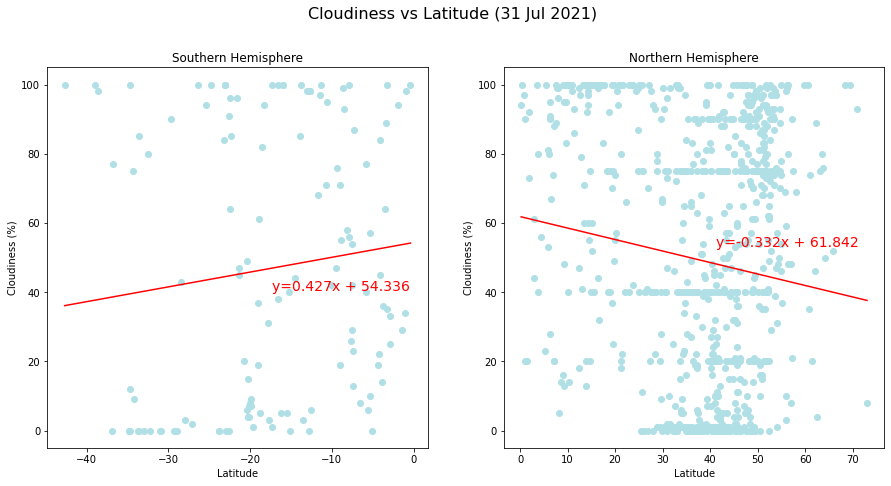

In [282]:
# Create a two-part figure that shows cloudiness for the Southern and Northern Hemispheres 
south_north_cloudiness_full_fig = plt.figure(figsize=(15,7))
south_north_cloudiness_full_fig.suptitle(t=f"Cloudiness vs Latitude ({date})", y=1, size=16)
southern_hemisphere_subplot(y_col="cloudiness (%)", ylabel="Cloudiness (%)")
northern_hemisphere_subplot(y_col="cloudiness (%)", ylabel="Cloudiness (%)")
plt.show()

# Save figure to .png file
south_north_cloudiness_full_fig.savefig("output_data/south_north_cloudiness_full_fig.png")

**The linear regressions of the above plots show a positive correlation between cloudiness and latitude in the Southern Hemisphere and a negative correlation in the Northern Hemisphere. Conclusion: The closer a city is to the Equator, the more likely it will be cloudier than cities further away from the Equator.**

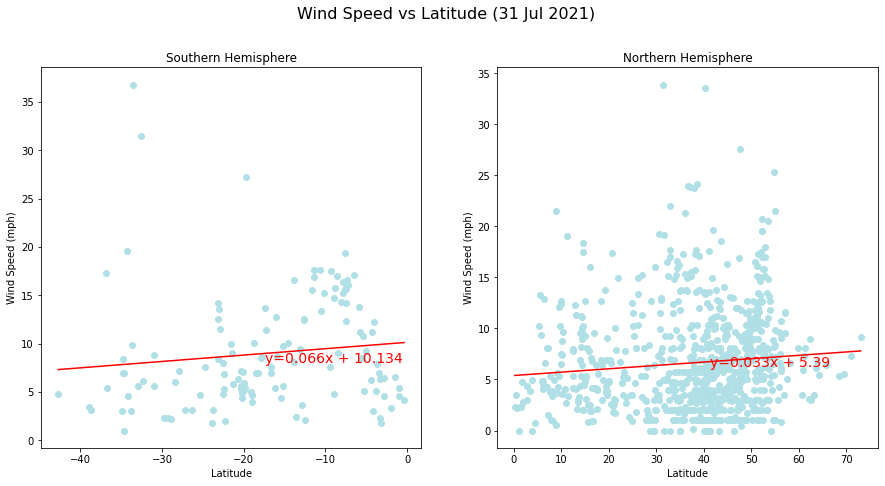

In [283]:
# Create a two-part figure that shows wind speed for the Southern and Northern Hemispheres 
south_north_wind_speed_full_fig = plt.figure(figsize=(15,7))
south_north_wind_speed_full_fig.suptitle(t=f"Wind Speed vs Latitude ({date})", y=1, size=16)
southern_hemisphere_subplot(y_col="wind_speed (mph)", ylabel="Wind Speed (mph)")
northern_hemisphere_subplot(y_col="wind_speed (mph)", ylabel="Wind Speed (mph)")
plt.show()

# Save figure to .png file
south_north_wind_speed_full_fig.savefig("output_data/south_north_wind_speed_full_fig.png")

**The linear regression of the above plots show a very slight positive correleation between wind speed and city latitde in the Southern Hemisphere and a slightly less positive correlelation between wind speed and city latitude in the Northern Hemisphere. Conclusion: In the both Hemispheres, wind speed is barely affected by latitude, with Southern Hemisphere winds speeds picking up slightly as city latitudes approach the equator and Northern Hemisphere winds speeds decreasing as city latitudes approach the Equator.**